In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly import tools
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [32]:
data = pd.read_csv("./data/classification_1.csv")
data.head()

,timestamp,B_18,B_2,B_19,B_16,Good/Bad,390.0,391.0,392.0,393.0,394.0,395.0,396.0,396.93,397.0,imputed
0,2020-03-01 00:00:00,8138.62,-0.0007,8.4195,521.66,0,0,0,1,0,0,0,0,0,0,0
1,2020-03-01 00:05:00,8131.49,0.0019,8.4318,522.28,0,0,0,1,0,0,0,0,0,0,0
2,2020-03-01 00:10:00,8133.23,-0.0043,8.4178,522.42,0,1,0,0,0,0,0,0,0,0,0
3,2020-03-01 00:15:00,8133.83,0.0007,8.3682,522.86,0,0,0,1,0,0,0,0,0,0,0
4,2020-03-01 00:20:00,8133.80,-0.0019,8.4294,522.19,0,0,0,0,1,0,0,0,0,0,0


In [33]:
data = data.set_index("timestamp")
data.head()

,B_18,B_2,B_19,B_16,Good/Bad,390.0,391.0,392.0,393.0,394.0,395.0,396.0,396.93,397.0,imputed
timestamp,,,,,,,,,,,,,,,
2020-03-01 00:00:00,8138.62,-0.0007,8.4195,521.66,0,0,0,1,0,0,0,0,0,0,0
2020-03-01 00:05:00,8131.49,0.0019,8.4318,522.28,0,0,0,1,0,0,0,0,0,0,0
2020-03-01 00:10:00,8133.23,-0.0043,8.4178,522.42,0,1,0,0,0,0,0,0,0,0,0
2020-03-01 00:15:00,8133.83,0.0007,8.3682,522.86,0,0,0,1,0,0,0,0,0,0,0
2020-03-01 00:20:00,8133.80,-0.0019,8.4294,522.19,0,0,0,0,1,0,0,0,0,0,0


In [8]:
Label = data['Good/Bad']
data.drop(columns=['Good/Bad'],inplace=True)

In [34]:
data = data[['B_18']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data,Label,test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [15]:
X_train,X_train.shape

(array([[0.16058888],
        [0.31800447],
        [0.13681527],
        ...,
        [0.21838423],
        [0.25739999],
        [0.11449826]]),
 (14566, 1))

In [16]:
X_test,X_test.shape

(array([[0.254955  ],
        [0.17364615],
        [0.11595485],
        ...,
        [0.19814805],
        [0.03521823],
        [0.3871404 ]]),
 (4047, 1))

In [30]:
y_train[:5], y_train.shape

(timestamp
 2020-03-30 00:40:00    0
 2020-03-10 06:35:00    0
 2020-04-05 08:40:00    0
 2020-04-13 20:20:00    0
 2020-04-02 19:55:00    0
 Name: Good/Bad, dtype: int64,
 (14566,))

In [31]:
y_test[:5], y_test.shape

(timestamp
 2020-05-10 03:05:00    0
 2020-04-14 22:35:00    0
 2020-04-21 19:50:00    1
 2020-04-01 13:35:00    0
 2020-04-21 15:00:00    0
 Name: Good/Bad, dtype: int64,
 (4047,))

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3429
           1       0.98      0.20      0.33       618

    accuracy                           0.88      4047
   macro avg       0.92      0.60      0.63      4047
weighted avg       0.89      0.88      0.84      4047



Text(0.5, 1.0, 'Confusion matrix')

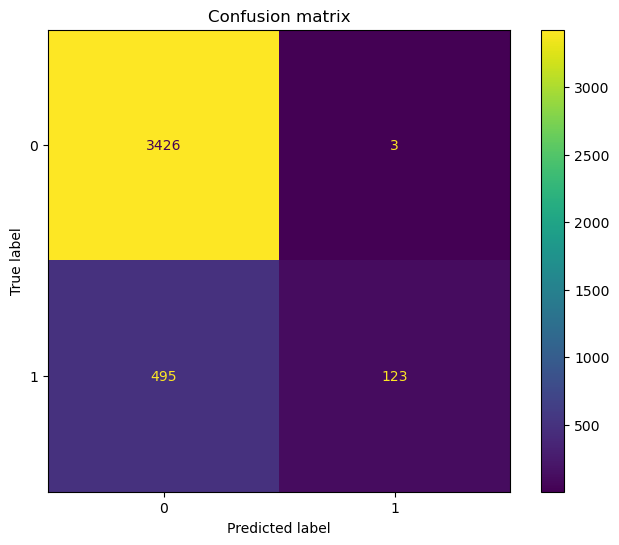

In [21]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion matrix')

In [36]:
slope = clf.coef_
intercept = clf.intercept_
print(slope[0],intercept)

[7.14252104] [-3.45959706]


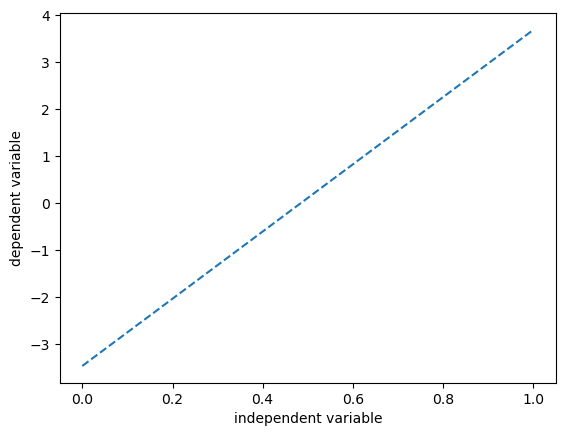

In [35]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope[0] * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.xlabel("independent variable")
    plt.ylabel("dependent variable")
abline(slope,intercept)

In [29]:
res = 7.14252104*x - 3.45959706
ans = 1/(1+np.exp(-res))

NameError: name 'x' is not defined